<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_B_filtro_e_densas_iguais_e_augmentation_jul_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     165   75.302734   75.439896  ...  208.299286  228.457962  211.743774
1     146   74.692436  126.028145  ...    0.551511    0.387127    1.428223
2     180  137.142715  134.348145  ...    1.046420    0.913087    0.646420
3     199  178.009186  166.880630  ...   93.637611   94.321030   84.062698
4     184  168.048676  179.222565  ...  192.234406  184.006592  154.443283
5     112  109.500000  107.062500  ...    1.562500    1.000000    0.875000
6     126  179.024689  201.864212  ...  147.790131  144.925934  141.913589
7     128  131.719727  130.054688  ...  176.222656  183.421875  189.036133
8     196  153.387756  150.408157  ...   96.693878   98.285713   97.571426
9     150  156.513428  138.329956  ...  114.962135   81.515915   84.939560
10    133   68.277016   72.033241  ...  161.055405  161.340729  163.922455
11    143  173.849716  178.568970  ...  133.665558  130.657196  134.863174
12    136  158.370255  15

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 17s 19ms/step - loss: 0.6159 - accuracy: 0.7136
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.8771
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.9230
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.9764
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9851
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9951
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9978
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9986
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1

In [17]:

# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 5
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=200)

Epoch 1/200
68/68 [==============================] - 2s 20ms/step - loss: 0.9277 - accuracy: 0.6982 - val_loss: 170.0074 - val_accuracy: 0.5102
Epoch 2/200
68/68 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.8254 - val_loss: 45.4445 - val_accuracy: 0.5102
Epoch 3/200
68/68 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.8609 - val_loss: 131.2180 - val_accuracy: 0.5102
Epoch 4/200
68/68 [==============================] - 0s 5ms/step - loss: 0.2910 - accuracy: 0.8935 - val_loss: 40.7562 - val_accuracy: 0.5102
Epoch 5/200
68/68 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.8905 - val_loss: 30.9924 - val_accuracy: 0.5102
Epoch 6/200
68/68 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.9112 - val_loss: 59.4079 - val_accuracy: 0.5102
Epoch 7/200
68/68 [==============================] - 0s 5ms/step - loss: 0.1908 - accuracy: 0.9201 - val_loss: 10.4077 - val_accuracy: 0.4898
Epo

In [18]:
# X_train.shape
steps_per_epoch

68

In [19]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 8/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 11/

In [20]:
Y_test = yback(Y_test)

In [21]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        71   1
1         2  73


In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   124.0    0.000000    0.000000  ...    0.000000    0.000000    0.000000
1   117.0  177.598206  177.623062  ...   98.639572   91.359558   96.984512
2   127.0   75.739410   75.409943  ...   57.261581   58.935459   62.211670
5   190.0   77.613190   77.997665  ...   49.993790   53.464928   59.269695
7   177.0   75.359726  107.797653  ...   57.421776   54.379036   54.671799
10  105.0   65.644447   62.720009  ...   41.284447   41.000004   40.457783
11  111.0   69.206718   66.934174  ...   37.065094   29.576088   18.495981
12  197.0   58.950920   53.335926  ...   56.756531   42.201351   39.788506
14  198.0   93.701355   94.796951  ...   75.085899   68.096718   69.287209
16  103.0   69.152794   67.450089  ...   37.832970   33.912716   25.103588
17  134.0   86.545563   87.061493  ...  101.385834  103.502121  104.187355
18  199.0   95.126076   91.837631  ...   61.657154   69.488449   84.189285
20  147.0   57.285717   5

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [28]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,124.0,0.000000,0.000000,0.000000,0.000000,0.437045,1.126951,2.434963,3.932362,6.077003,9.662850,12.052028,14.109260,16.774193,18.580645,19.332985,20.097815,21.316336,24.052029,34.014565,47.539021,54.558788,57.858479,59.818935,60.486988,59.793961,59.489071,58.176899,57.856396,0.000000,0.000000,0.000000,0.000000,0.000000,0.155047,1.272633,1.632674,1.675338,2.182102,2.364204,...,0.935484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021852,0.524454,0.473465,0.000000,0.000000,0.000000,0.590010,3.003122,3.636836,3.040583,0.539022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,117.0,177.598206,177.623062,161.736893,70.109436,63.866539,71.174583,73.351891,74.613190,74.206154,74.218422,73.758934,71.831551,68.214912,64.105049,56.175030,49.072685,43.910149,41.533787,40.493099,40.061363,40.379940,41.137043,42.384907,46.571045,56.397480,66.049599,71.879906,76.097748,196.874252,196.703049,188.071304,71.050034,62.997810,74.484703,76.563957,76.982536,77.845711,77.878738,75.814445,...,116.266708,117.063995,118.537949,120.572289,121.820953,121.126816,122.346626,117.639931,106.619400,98.100449,90.443642,95.382202,52.457447,48.030243,46.667103,49.047707,50.730297,50.981152,57.172039,57.358170,53.646797,46.977356,74.018333,94.635040,102.830521,119.627518,139.344162,132.953918,123.598289,120.219666,120.585144,121.410912,120.493019,119.528015,120.342682,117.303307,108.077209,98.639572,91.359558,96.984512
2,127.0,75.739410,75.409943,74.833214,73.969299,73.363701,72.417938,69.430283,67.942154,67.325806,65.022881,60.963860,58.639591,59.143158,54.533325,51.555336,50.613426,51.463821,75.113159,90.858391,91.001358,90.452408,93.391220,94.706116,108.794289,126.101120,118.448944,96.106453,88.772713,72.974075,73.341995,74.309807,77.003220,80.457634,77.305161,70.765144,68.587074,63.275837,59.411491,59.862236,...,42.250420,47.287308,51.983013,51.966274,51.061878,51.390972,50.322769,50.064480,50.443798,53.547398,56.700352,58.799305,88.567680,88.217255,88.911896,89.598854,88.627998,89.288559,88.579956,85.570709,67.726265,44.972839,43.295059,42.718952,38.955296,33.500900,36.781261,41.534443,46.838799,53.010788,56.103416,58.269325,57.246265,57.208073,54.218365,50.636616,53.676117,57.261581,58.935459,62.211670
5,190.0,77.613190,77.997665,72.510139,71.488533,74.430908,78.200890,81.308365,78.656181,77.130081,73.938713,63.467251,58.996120,60.886089,61.631798,60.422264,64.441101,64.964867,65.213295,63.359661,51.213848,52.174290,60.200657,62.866142,64.500053,69.590904,72.872459,76.891960,80.249084,77.706039,80.283104,82.905708,76.826141,73.362091,76.635674,77.057289,79.245430,79.682327,74.721649,63.423595,...,41.112793,37.548920,33.309582,33.967533,34.310577,37.421936,38.814186,41.019829,39.881439,37.123325,47.015293,80.454842,73.489410,105.888535,137.227234,82.703148,76.905594,81.946251,82.384377,84.392342,86.302498,89.945038,91.651855,92.883759,92.712799,91.159996,76.337387,46.146812,38.451965,34.206421,32.113571,36.994015,43.320885,50.344479,50.513901,50.775177,49.691517,49.993790,53.464928,59.269695
7,177.0,75.359726,107.797653,123.991295,118.290840,87.559036,81.610794,102.345383,110.453262,114.304909,120.418358,121.272675,121.391472,122.573067,125.855904,118.316986,95.139671,48.208618,39.192822,42.423634,43.567875,53.460846,94.536713,113.042534,93.344498,80.316597,78.235329,78.456215,76.995331,84.284042,100.904686,119.140457,112.725266,98.626465,84.961304,76.564873,92.263435,106.915848,117.500801,122.704773,...,97.060387,100.324516,100.394043,97.067337,88.930984,61.325573,54.229721,56.571384,56.541122,56.497971,56.182411,56.661076

In [29]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

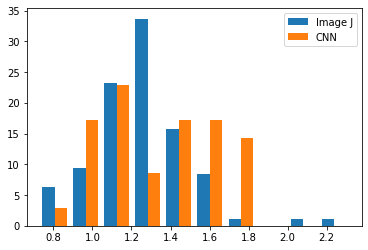

In [30]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.72648699 0.88558221 1.04467743 1.20377265 1.36286787 1.52196309
 1.68105831 1.84015353 1.99924875 2.15834397 2.31743919]
[[ 6.31578947  9.47368421 23.15789474 33.68421053 15.78947368  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 2.85714286 17.14285714 22.85714286  8.57142857 17.14285714 17.14285714
  14.28571429  0.          0.          0.        ]]


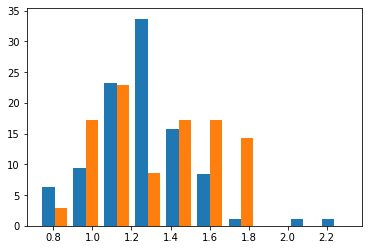

In [31]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [32]:
print(counts.sum())

200.00000000000014


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


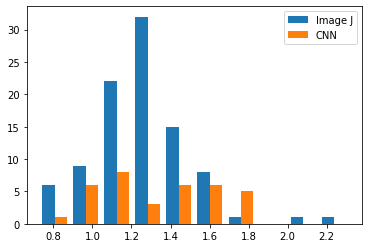

In [33]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [34]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1